<a href="https://colab.research.google.com/github/gosaitos/Computer_vision/blob/main/Background_subtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

***Bg subtraction***

In [ ]:
fgbg1 = cv2.bgsegm.createBackgroundSubtractorMOG();
fgbg2 = cv2.createBackgroundSubtractorMOG2();

cap = cv2.VideoCapture(r"C:\Users\haris\Downloads\video.mp4");
while(1):
	# read frames
	ret, img = cap.read();

	# apply mask for background subtraction
	fgmask1 = cv2.resize(fgbg1.apply(img),(600,480));
	fgmask2 = cv2.resize(fgbg2.apply(img),(600,480));


	cv2.imshow('Original', cv2.resize(img,(600,480)));
	cv2.imshow('MOG', fgmask1);
	cv2.imshow('MOG2', fgmask2);
	k = cv2.waitKey(30) & 0xff;
	if k == 27:
		break;

cap.release();
cv2.destroyAllWindows();


***Bg subtraction using averaging method***

In [ ]:
cap = cv2.VideoCapture(r"C:\Users\haris\Downloads\video.mp4")
ret, frame = cap.read()
if not ret:
    print("Error: Couldn't read video")
    cap.release()
    cv2.destroyAllWindows()
    exit()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
avg_bg = np.float32(gray)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.accumulateWeighted(gray, avg_bg, 0.01)
    bg_model = cv2.convertScaleAbs(avg_bg)
    fg_mask = cv2.absdiff(gray, bg_model)
    _, fg_mask = cv2.threshold(fg_mask, 40, 255, cv2.THRESH_BINARY)
    small_bg_model = cv2.resize(bg_model, (600, 480))  # Adjust width & height as needed
    small_fg_mask = cv2.resize(fg_mask, (600, 480))
    cv2.imshow("Background Model", small_bg_model)
    cv2.imshow("Foreground Mask", small_fg_mask)

    if cv2.waitKey(30) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


***Scene detection using Bg subtraction***

Scene 2 Changed! Waiting for stabilization...
Scene 2 Stabilized! Saving frame...
Scene 3 Changed! Waiting for stabilization...
Scene 3 Stabilized! Saving frame...
Total Scenes Detected: 3


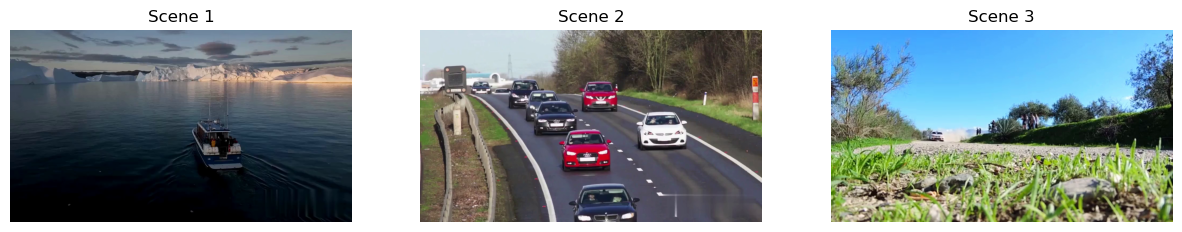

Processing Complete. All detected scenes displayed.


In [ ]:
video_path = r"C:\Users\haris\Downloads\mixed.mp4"
cap = cv2.VideoCapture(video_path)
fgbg = cv2.createBackgroundSubtractorMOG2()
ret, frame = cap.read()
if not ret:
    print("Error: Couldn't read video")
    cap.release()
    exit()
scenes = [frame.copy()]

prev_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
prev_hist = cv2.calcHist([prev_gray], [0], None, [256], [0, 256])
cv2.normalize(prev_hist, prev_hist, 0, 1, cv2.NORM_MINMAX)

scene_change_detected = False

while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    curr_hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    cv2.normalize(curr_hist, curr_hist, 0, 1, cv2.NORM_MINMAX)
    similarity = cv2.compareHist(prev_hist, curr_hist, cv2.HISTCMP_CORREL)
    fg_mask = fgbg.apply(frame)
    change_ratio = np.count_nonzero(fg_mask) / fg_mask.size
    if similarity < 0.5 and change_ratio > 0.3 and not scene_change_detected:
        print(f"Scene {len(scenes) + 1} Changed! Waiting for stabilization...")
        scene_change_detected = True
    elif scene_change_detected and similarity > 0.9:
        print(f"Scene {len(scenes) + 1} Stabilized! Saving frame...")
        scenes.append(frame.copy())
        scene_change_detected = False  # Reset flag
    prev_hist = curr_hist.copy()

cap.release()
print(f"Total Scenes Detected: {len(scenes)}")
plt.figure(figsize=(15, 5))

for i, scene in enumerate(scenes):
    plt.subplot(1, len(scenes), i + 1)
    plt.imshow(cv2.cvtColor(scene, cv2.COLOR_BGR2RGB))
    plt.title(f"Scene {i + 1}")
    plt.axis("off")

plt.show()
print("Processing Complete. All detected scenes displayed.")
